# ES335: Machine Learning - Prerequisite Test
---

**Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

**Solution**: The product matrix will be a `(n x m)` matrix, which will consist of totally `n x m` elements. To compute the value of each element, `k` multiplications and `(k-1)` additions must be performed. Therefore, to perform the matrix multiplication of the given matrices,

  
*Number of multiplications to be performed = `(n x m) x k`*

*Number of additions to be performed = `(n x m) x (k-1)`*

---

**Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [140]:
# Using lists of lists approach

import time

def matrix_multiply(A,B):
    if len(A[0]) != len(B):
        print("Inner dimensions of the matrices are not equal")
        return

    n, k = len(A), len(A[0])
    k, m = len(B), len(B[0])

    prod = []
    for i in range(n):
        c = []
        for j in range(m):
            sum = 0
            for p in range(k):
                sum += A[i][p] * B[p][j]
            c.append(sum)
        prod.append(c)

    return prod

A = [[1,2,3],[1,3,5]]
B = [[1,2],[2,3],[3,4]]

start_time = time.time()
product = matrix_multiply(A,B)
end_time = time.time()
time_taken_1 = end_time - start_time

print(product)

print(f"Time taken using manual looping: {time_taken_1:.15f} seconds")

[[14, 20], [22, 31]]
Time taken using manual looping: 0.013000011444092 seconds


In [144]:
# Using numpy approach

import time

import numpy as np

A = np.array([[1, 2, 3], [1, 3, 5]])
B = np.array([[1, 2], [2, 3], [3, 4]])

start_time = time.time()
product = np.dot(A, B)
end_time = time.time()

time_taken_2 = end_time - start_time

print(product)
print(f"Time taken using numpy: {time_taken_2:.15f} seconds")

[[14 20]
 [22 31]]
Time taken using numpy: 0.000999927520752 seconds


*Clearly, from the time taken by the two approaches, it is clear that `numpy` is highly optimised and definitely more efficient than manual looping methods.* 

`[numpy: 0.000999927520752 seconds < manual looping: 0.013000011444092 seconds]`

---

**Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

**Solution:** To find the *median of the array*, we require exactly `(n+1)/2` passes of the array where `n` is the length of the array. Each pass will have to traverse `m` elements where `m` starts from `n` and reduces by 1 with each pass. (Assumption: n is odd)

Upper limit = `(n+1)/2` * `n`

*Therefore, the time complexity of finding the median of the array is $\mathcal{O}(n^2)$.*

A better method would be to first sort the arrays using quicksort $\mathcal{O}(n logn)$ and then find the middle element as `(n+1)/2`th element if the length of the list is odd and if the list has even number of elements, median = ( `n/2` + `n/2 + 1` ) / 2

*NOTE: In the above explanation, all indices are assumed to start from 1.*


In [28]:
import numpy as np
import time

def find_median_highest_element(arr):
    n = len(arr)
    median_index = (n - 1) // 2
    for _ in range(median_index + 1):
        max_index = 0
        for i in range(1, n):
            if arr[i] > arr[max_index]:
                max_index = i
        arr[max_index], arr[n - 1] = arr[n - 1], arr[max_index]
        n -= 1
    return arr[median_index]

np.random.seed(355)
data = np.random.randint(10, 100, 11)
start_time = time.time()
print(find_median_highest_element(data))
end_time = time.time()
time_taken = end_time - start_time
print("Time taken using the inefficient first method:", time_taken)


45
Time taken using the inefficient first method: 0.014000177383422852


In [36]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[0]
    left = [x for x in arr[1:] if x < pivot]
    right = [x for x in arr[1:] if x >= pivot]
    return quicksort(left) + [pivot] + quicksort(right)

def find_median_quicksort(lst):
    sorted_lst = quicksort(lst)
    if len(sorted_lst) % 2 == 0:
        return (sorted_lst[len(sorted_lst) // 2] + sorted_lst[(len(sorted_lst) // 2) - 1]) / 2
    else:
        return sorted_lst[len(sorted_lst) // 2]

start_time = time.time()
print(find_median_quicksort(data))
end_time = time.time()
time_taken = end_time - start_time
print("Time taken using the quicksort method:", time_taken)


45
Time taken using the quicksort method: 0.0019998550415039062


In [30]:
import numpy as np

start_time = time.time()
median = np.median(data)
end_time = time.time()
time_taken = end_time - start_time

# Print the data and the median
print("Data:", data)
print("Median:", median)
print("Time taken using the numpy median method:", time_taken)

Data: [12 41 28 27 39 45 55 56 61 64 87]
Median: 45.0
Time taken using the numpy median method: 0.0010001659393310547


From the times computed for each method, it is clear that the `numpy.median` is the most efficient method, followed by the `quicksort` method and the manual `highest-element` calculation method.

*Highest-element: `0.014000177383422852 seconds` > Quicksort: `0.0019998550415039062 seconds` > Numpy: `0.0010001659393310547 seconds`*


---

**Q4. What is the gradient of the following function with respect to x and y?**
\begin{equation}
x^2 y + y^3 \sin x
\end{equation}

*Gradient of the given function = (Partial derivative of the function wrt x, Partial derivative of the function wrt x)*

Therefore, the gradient of the given function $f(x, y)$ with respect to $x$ and $y$ is:

\begin{equation*}
\nabla f(x, y) = (2xy + y^3 \cos x, x^2 + 3y^2 \sin x)
\end{equation*}



---

**Q5. Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.**

In [1]:
import jax.numpy as jnp
from jax import grad


def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)


def gradient(x, y):
  value1 = 2 * x * y + y**3 * math.cos(x)
  value2 = x**2 + 3 * y**2 * math.sin(x)
  return value1, value2
    

grad_jax = grad(f)

key = jax.random.PRNGKey(331)
x, y = jax.random.uniform(key, (2,), minval=-5, maxval=5)

gradient_theoretical = gradient(x,y)
gradient_analytical = grad_jax(x, y)

print("Theoretical gradient:", gradient_theoretical)
print("Analytical gradient:", gradient_analytical)

assert jnp.allclose(gradient_theoretical, gradient_analytical, atol=1e-4)


<class 'ModuleNotFoundError'>: No module named 'jax'

---

**Q6. Use `sympy` to confirm that you obtain the same gradient analytically.**

In [4]:
import sympy as sp

x, y = sp.symbols('x y')

def gradient(f):
    return (f.diff(x), f.diff(y))

f = x**2 * y + y**3 * sin(x)
analytical_gradient = gradient(f)
print("The gradient of function using sympy is: ", analytical_gradient)

The gradient of function using sympy is:  (2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))


---

**Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:**

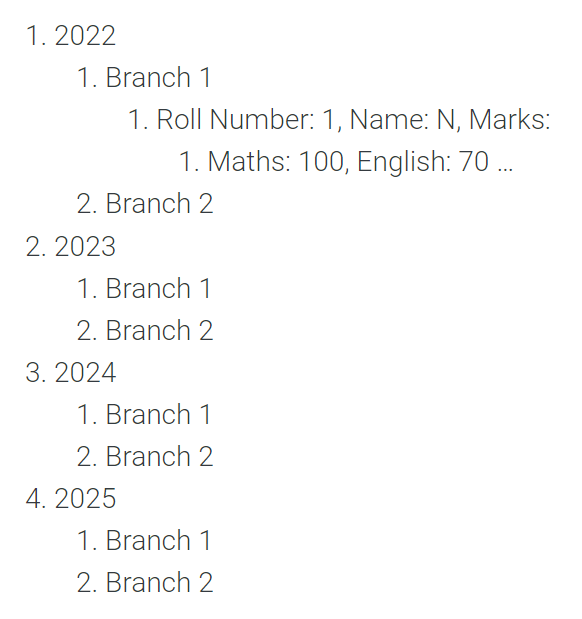

In [136]:
nested_dict = {
    2022: {
        "Branch 1": {
            "Roll Number": 1,
            "Name": "N",
            "Marks": {
                "Maths": 100,
                "English": 70,
            },
        }
    },
    2023: {"Branch 1": {}, "Branch 2": {}},
    2024: {"Branch 1": {}, "Branch 2": {}},
    2025: {"Branch 1": {}, "Branch 2": {}},
}


---

**Q8. Store the same information using Python classes. We have an overall database, which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [139]:
class Student:
   def __init__(self, name, roll_number, marks):
       self.name = name
       self.roll_number = roll_number
       self.marks = marks  # Assuming marks are stored as a dictionary (subject: mark)

class Branch:
   def __init__(self, name):
       self.name = name
       self.students = []

   def add_student(self, student):
       self.students.append(student)

class Year:
   def __init__(self, year):
       self.year = year
       self.branches = []

   def add_branch(self, branch):
       self.branches.append(branch)

class Database:
   def __init__(self):
       self.years = []

   def add_year(self, year):
       self.years.append(year)

database = Database()

year2024 = Year(2024)

ee_branch_24 = Branch("Electrical")
ee_branch_24.add_student(Student("Sriram", 22000182, {"Math": 95, "Physics": 88}))
ee_branch_24.add_student(Student("Anban", 22105010, {"Math": 82, "Chemistry": 90}))

year2024.add_branch(ee_branch_24)
database.add_year(year2024)

#Verifying the values
print(database.years[0].branches[0].students[0].name) 
print(database.years[0].branches[0].students[1].marks) 


Sriram
{'Math': 82, 'Chemistry': 90}


---

**Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**
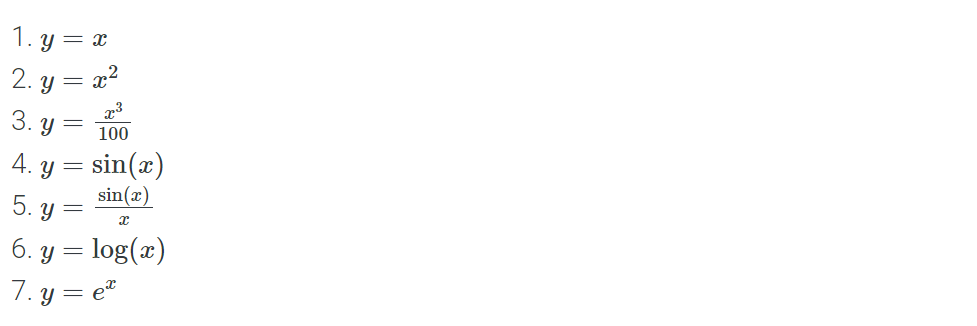

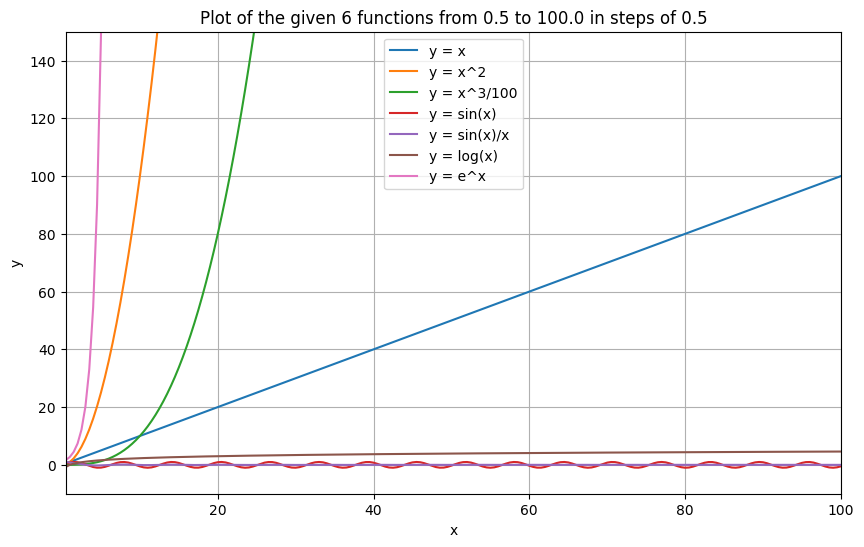

In [132]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.1, 0.5)

def f1(x):
    return x

def f2(x):
    return x**2

def f3(x):
    return x**3 / 100

def f4(x):
    return np.sin(x)

def f5(x):
    return np.sin(x) / x

def f6(x):
    return np.log(x)

def f7(x):
    return np.exp(x)


plt.figure(figsize=(10, 6))

plt.plot(x, f1(x), label="y = x")
plt.plot(x, f2(x), label="y = x^2")
plt.plot(x, f3(x), label="y = x^3/100")
plt.plot(x, f4(x), label="y = sin(x)")
plt.plot(x, f5(x), label="y = sin(x)/x")
plt.plot(x, f6(x), label="y = log(x)")
plt.plot(x, f7(x), label="y = e^x")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of the given 6 functions from 0.5 to 100.0 in steps of 0.5")

plt.legend()

plt.grid(True)
plt.xlim(0.5, 100)
plt.ylim(-10, 150)

plt.show()

---

**Q10. Using numpy generate a matrix of size `20X5` containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [119]:
import pandas as pd
import numpy as np

np.random.seed(335)  
matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(data=matrix, columns=["a", "b", "c", "d", "e"])

highest_std_col = (df.std().idxmax())
print(f"Column with highest standard deviation: {highest_std_col}")
print(df.loc[:,highest_std_col])
print()

lowest_mean_row = (df.mean(axis=1).idxmin())
print(f"Row with lowest mean: {lowest_mean_row}")
print(df.loc[lowest_mean_row])
print()



Column with highest standard deviation: c
0     1.828880
1     1.449868
2     1.533258
3     1.154367
4     1.117398
5     1.162419
6     1.792185
7     1.957023
8     1.225115
9     1.916136
10    1.884083
11    1.070013
12    1.099072
13    1.527857
14    1.754829
15    1.111547
16    1.999340
17    1.342591
18    1.956001
19    1.295615
Name: c, dtype: float64

Row with lowest mean: 16
a    1.131270
b    1.371791
c    1.999340
d    1.050370
e    1.012534
Name: 16, dtype: float64



---

**Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [124]:
import pandas as pd

df["f"] = df[["a", "b", "c", "d", "e"]].sum(axis=1)
df["g"] = df["f"].apply(lambda x: "LT8" if x < 8 else "GT8")

lt8_count = df[df["g"] == "LT8"].shape[0]
print("Number of rows where g is LT8:", lt8_count)

std_dev_lt8 = df[df["g"] == "LT8"]["f"].std()
std_dev_gt8 = df[df["g"] == "GT8"]["f"].std()
print("Standard deviation of f for LT8 rows:", std_dev_lt8)
print("Standard deviation of f for GT8 rows:", std_dev_gt8)


Number of rows where g is LT8: 17
Standard deviation of f for LT8 rows: 0.454960182520691
Standard deviation of f for GT8 rows: 0.15480034348716856


---

**Q12. Write a small piece of code to explain broadcasting in numpy.**

**Solution:** Broadcasting is used in `numpy` to perform arithmetic operations between two arrays of *non-compatible dimensions* for a specific operation. The smaller array is broadcasted/magnified to be operated with the larger array. Broadcasting makes the code simpler and allows for memory-efficient computation, especially when the array sizes are large. In the below example, `arr2` is duplicated twice implicitly and then added to `arr1`, thus reducing the need to duplicate manually.


In [16]:
import numpy as np

arr1 = np.array([[1,2,3],[1,2,3],[1,2,3]])
arr2 = np.array([1,1,1])
sum = arr1 + arr2 

print(sum)

[[2 3 4]
 [2 3 4]
 [2 3 4]]


---

**Q13. Write a function to compute the `argmin` of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the `np.argmin` function to verify your solution.**

In [9]:
import numpy as np

def compute_argmin(arr):
    if arr.size == 0:
        raise ValueError
  
    min_index = 0
    min_value = arr[0]
    for i in range(1, arr.size):
        if arr[i] < min_value:
            min_index = i
            min_value = arr[i]
    return min_index

arr = np.array([4, 2, 1, 5, 3])

print("Argmin: Index of minimum element in an array\n")
print("Argmin computed using self-defined function:", compute_argmin(arr))
print("Argmin computed using numpy:", np.argmin(arr))



Argmin: Index of minimum element in an array

Argmin computed using self-defined function: 2
Argmin computed using numpy: 2


---